# Regresión lineal para la predicción de la concentración de Dióxido de Nitrógeno basada en datos de monitoreo (2022-2023)

## I. Unión de Datos 2022-2023

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos<

data2022 = pd.read_csv("https://raw.githubusercontent.com/Marflor2004/CrackDetect/main/ENTREGABLES/TALLER_1/California_data2022.csv")
data2023 = pd.read_csv("https://raw.githubusercontent.com/Marflor2004/CrackDetect/main/ENTREGABLES/TALLER_1/California_data2023.csv")

# Unir ambos DataFrames
data_df = pd.concat([data2022, data2023], ignore_index=True)


## II. Exploración del conjunto de datos

In [56]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                683 non-null    object 
 1   Source                              683 non-null    object 
 2   Site ID                             683 non-null    int64  
 3   POC                                 683 non-null    int64  
 4   Daily Max 1-hour NO2 Concentration  683 non-null    float64
 5   Units                               683 non-null    object 
 6   Daily AQI Value                     683 non-null    int64  
 7   Local Site Name                     683 non-null    object 
 8   Daily Obs Count                     683 non-null    int64  
 9   Percent Complete                    683 non-null    float64
 10  AQS Parameter Code                  683 non-null    int64  
 11  AQS Parameter Description           683 non-n

## III. Visualización de relaciones en los datos

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

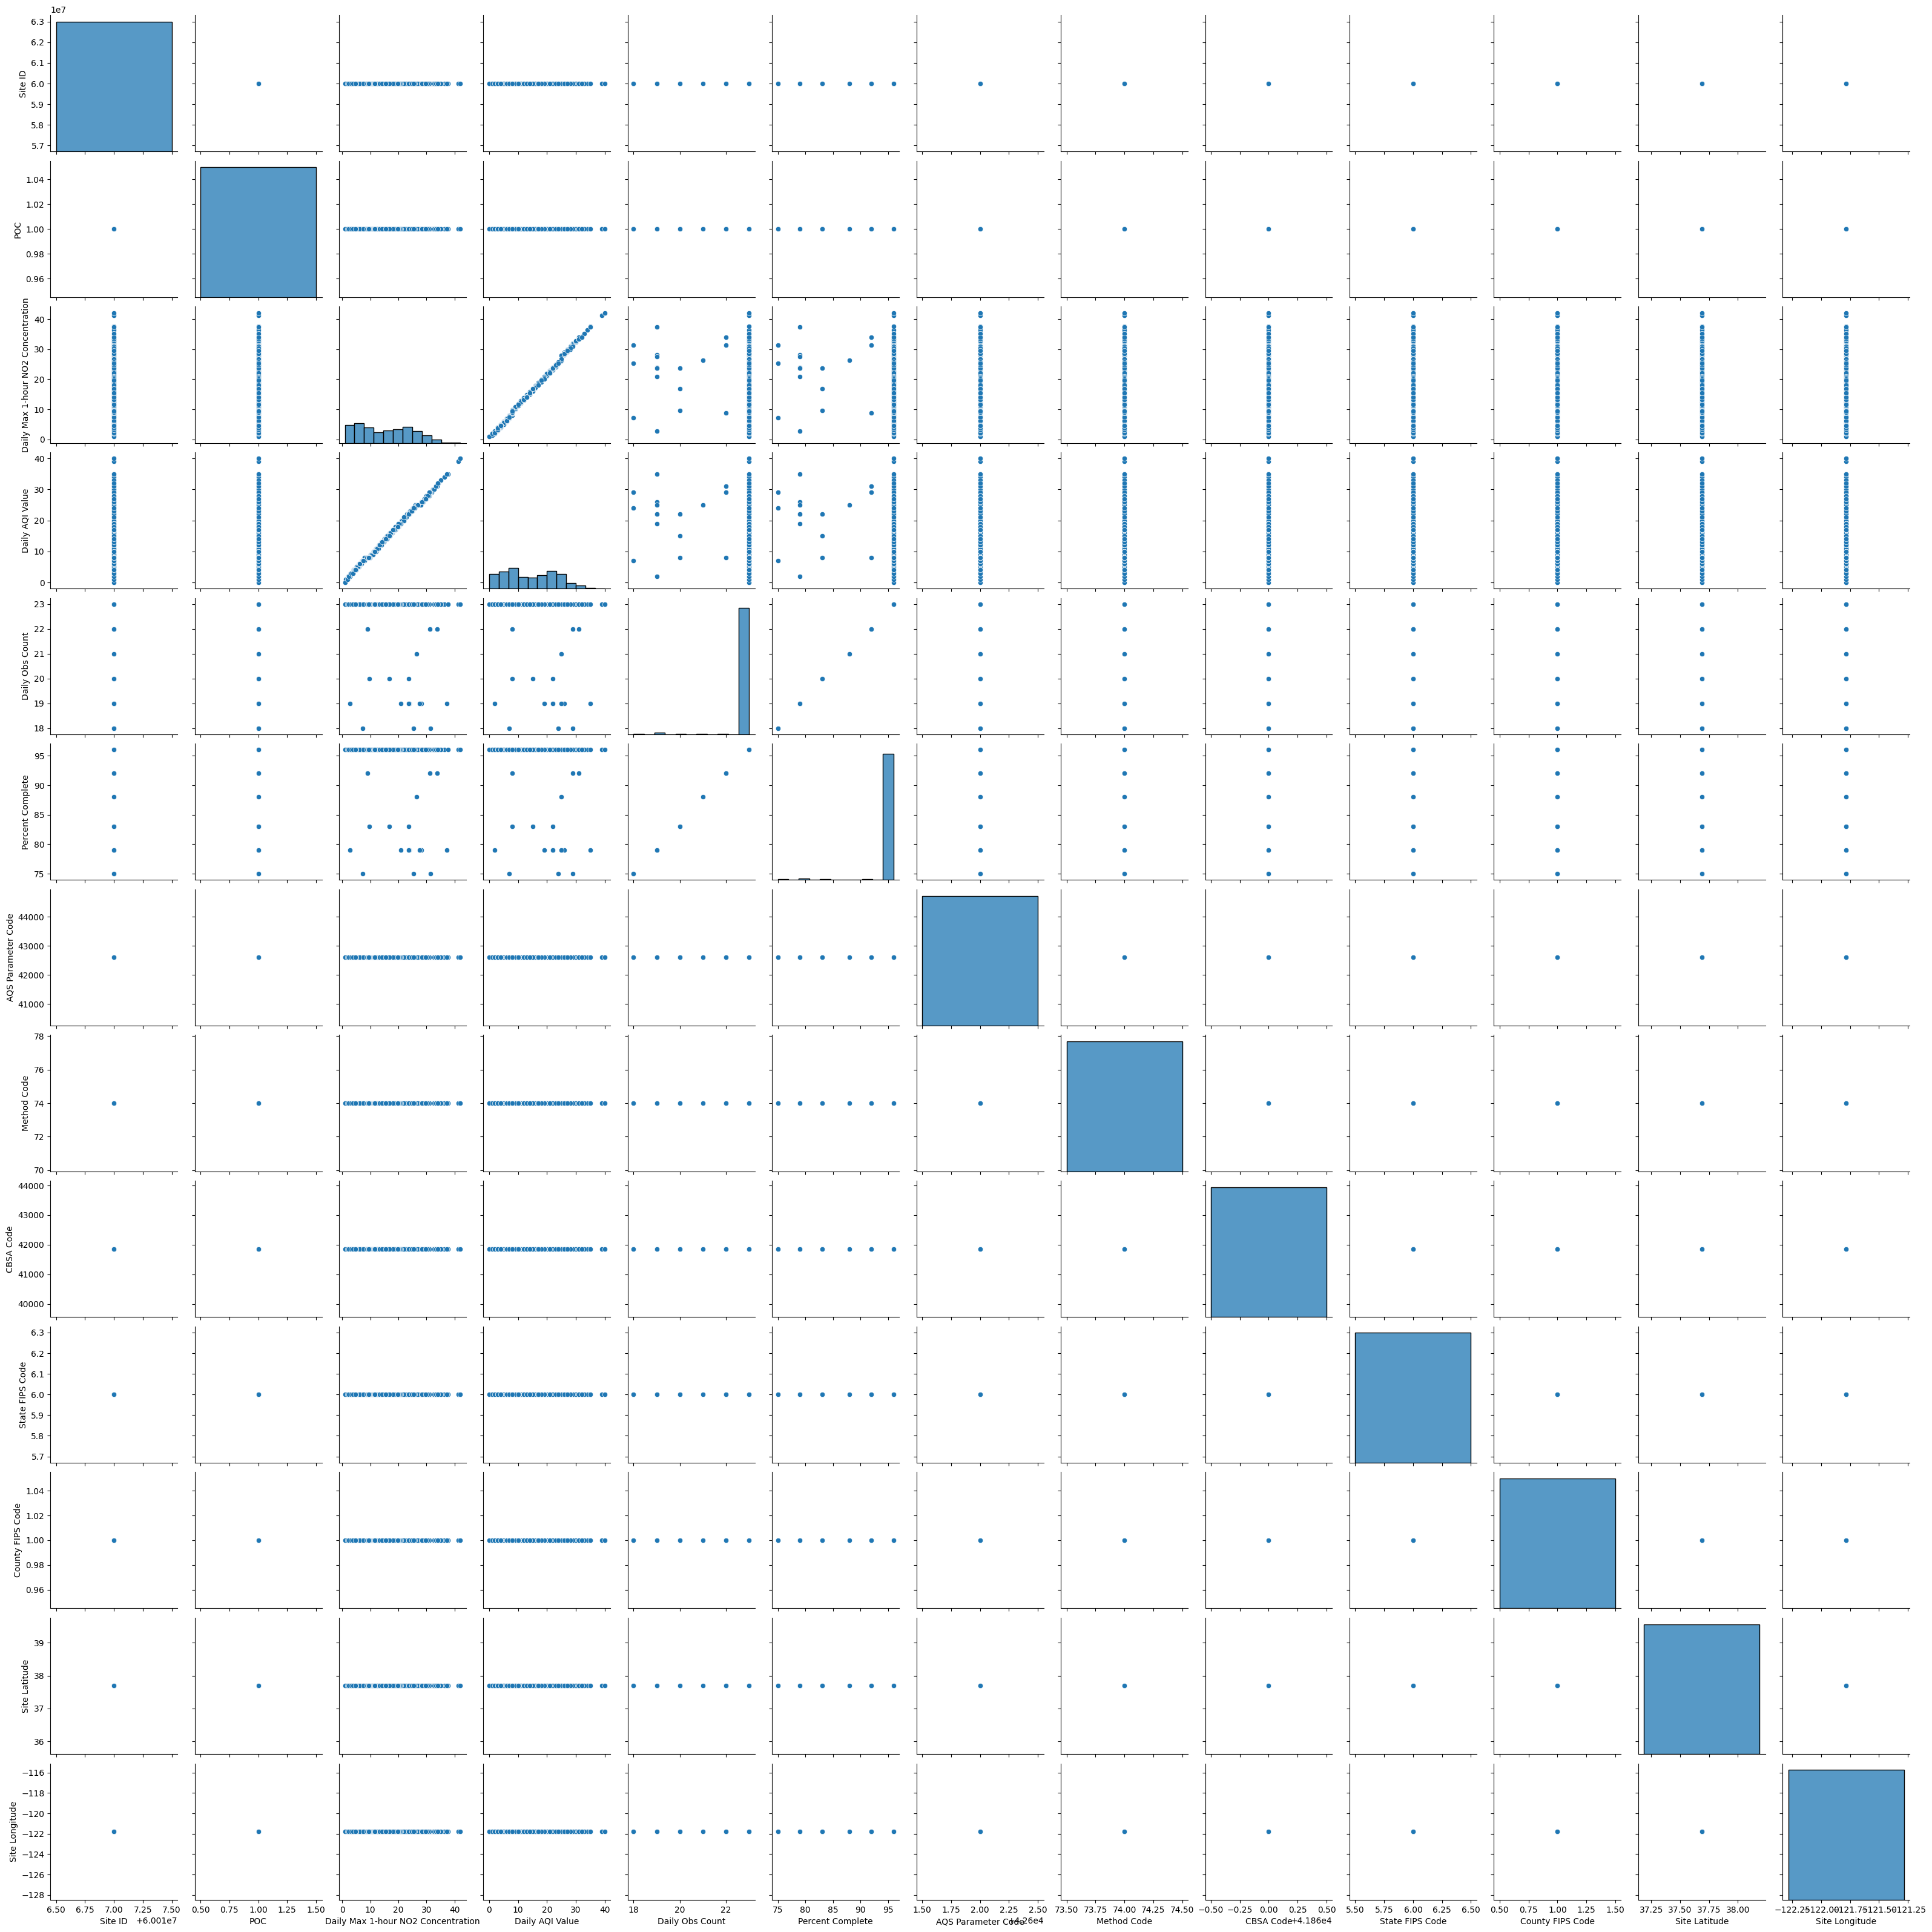

In [58]:
sns.pairplot(data_df)

De acuerdo con las gráficas, el valor del Índice de Calidad del Aire (AQI VALUE) muestra una relación directa con la concentración de dióxido de nitrógeno (NO₂). Por lo tanto, se usará el AQI VALUE y la variable "Date" en el modelo de regresión lineal para capturar tanto la relación entre AQI y NO₂ como las tendencias temporales en el conjunto de datos.

## IV. Separación entre Entrenamiento y Test

In [59]:
print(len(data_df))

683


Este comando imprime la longitud total del DataFrame data_df, que representa el número total de filas en el conjunto de datos.

In [60]:
indice_particion = int(0.8 * len(data_df))
train_df = data_df[:indice_particion]
test_df = data_df[indice_particion:]

Estas líneas dividen el conjunto de datos data_df en dos partes: el 80% de las filas se usan para entrenamiento (train_df), y el 20% restante se reserva para prueba (test_df). Esto permite entrenar y evaluar el modelo de manera adecuada.



## V. Extracción de Características

In [61]:
# Selecciona las columnas deseadas
train_df = train_df[['Date', 'Daily AQI Value', 'Daily Max 1-hour NO2 Concentration']]


In [62]:
import pandas as pd

# Convierte la columna 'Date' en un formato datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Crea la columna 'Time' como el número de días desde la fecha mínima
train_df['Time'] = (train_df['Date'] - train_df['Date'].min()).dt.days

# Selecciona las columnas deseadas
train_df = train_df[['Date', 'Daily AQI Value', 'Daily Max 1-hour NO2 Concentration', 'Time']]


Se seleccionaron las columnas relevantes del DataFrame train_df, que incluyen 'Date', 'Daily AQI Value', y 'Daily Max 1-hour NO2 Concentration', para centrarse en las variables clave del análisis. Luego, se convirtió la columna 'Date' al formato datetime para facilitar el manejo y las operaciones con fechas. Además, se creó una columna 'Time', que calcula los días desde la fecha mínima, transformando las fechas en una variable numérica útil para la regresión. Finalmente, se reorganizó el DataFrame para incluir las columnas necesarias en el orden adecuado, preparando así los datos para el análisis y modelización.

## VI. Entrenamiento del modelo

In [63]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Verifica las columnas disponibles
print(train_df.columns)


Index(['Date', 'Daily AQI Value', 'Daily Max 1-hour NO2 Concentration',
       'Time'],
      dtype='object')


In [64]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Verifica las columnas disponibles
print(train_df.columns)

# Selecciona las columnas deseadas sin 'Date'
train_df = train_df[['Daily AQI Value', 'Daily Max 1-hour NO2 Concentration', 'Time']]

# Define las características y la etiqueta
X = train_df[['Time', 'Daily AQI Value']]
y = train_df['Daily Max 1-hour NO2 Concentration']

# Crea y entrena el modelo
model = LinearRegression()
model.fit(X, y)

# Realiza predicciones
predictions = model.predict(X)



# Calcula el error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")


Index(['Date', 'Daily AQI Value', 'Daily Max 1-hour NO2 Concentration',
       'Time'],
      dtype='object')
Mean Squared Error: 0.17955973236495326


El valor del Error Cuadrático Medio (MSE) de aproximadamente 0.18 muestra que el modelo de regresión lineal tiene un error promedio relativamente bajo en sus predicciones. Lo que sugiere que el modelo se ajusta bien a los datos y realiza predicciones razonablemente precisas para la concentración de NO₂, basándose en las características proporcionadas.

In [65]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Verifica las columnas disponibles
print("Columnas actuales en el test: ")
print(test_df.columns)


Columnas actuales en el test: 
Index(['Date', 'Source', 'Site ID', 'POC',
       'Daily Max 1-hour NO2 Concentration', 'Units', 'Daily AQI Value',
       'Local Site Name', 'Daily Obs Count', 'Percent Complete',
       'AQS Parameter Code', 'AQS Parameter Description', 'Method Code',
       'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')


In [66]:

# Calcula la característica 'Time' en test_df usando .loc para evitar SettingWithCopyWarning
# Hacer una copia explícita del DataFrame para evitar el SettingWithCopyWarning
test_df = test_df.copy()
test_df['Time'] = (pd.to_datetime(test_df['Date']) - pd.to_datetime('2022-01-01')).dt.days

print("Columnas actualizadas en el test: ")
print(test_df.columns)

# Selecciona las columnas deseadas sin 'Date'
test_df = test_df[['Daily AQI Value', 'Daily Max 1-hour NO2 Concentration', 'Time']]

# Define las características y la etiqueta en test_df
X_test = test_df[['Time', 'Daily AQI Value']]
y_test = test_df['Daily Max 1-hour NO2 Concentration']

# Realiza predicciones sobre test_df
predictions_test = model.predict(X_test)


Columnas actualizadas en el test: 
Index(['Date', 'Source', 'Site ID', 'POC',
       'Daily Max 1-hour NO2 Concentration', 'Units', 'Daily AQI Value',
       'Local Site Name', 'Daily Obs Count', 'Percent Complete',
       'AQS Parameter Code', 'AQS Parameter Description', 'Method Code',
       'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude',
       'Time'],
      dtype='object')


## VII. PREDICCIÓN


     Time  Daily AQI Value  Actual  Predicted
546   571                8     9.1   8.863771
547   572                6     6.6   6.734176
548   577                6     6.3   6.734472
549   578                3     3.3   3.540049
550   579                3     3.3   3.540108
..    ...              ...     ...        ...
678   725               17    18.0  18.456341
679   726               15    16.8  16.326745
680   727               13    14.1  14.197150
681   728                8     9.5   8.873072
682   729               14    15.4  15.262096

[137 rows x 4 columns]


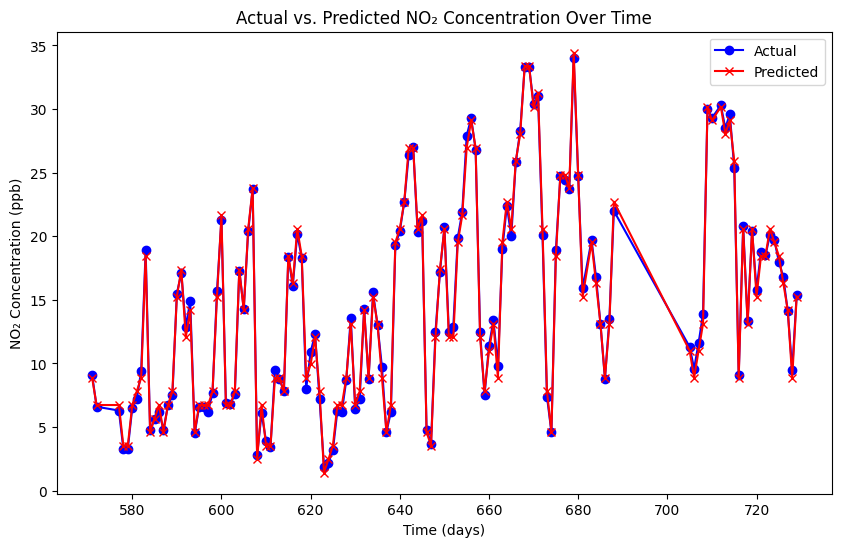

In [67]:
import matplotlib.pyplot as plt

# Crear el DataFrame results_df (según tu código)
results_df = pd.DataFrame({
    'Time': X_test['Time'],
    'Daily AQI Value': X_test['Daily AQI Value'],
    'Actual': y_test,
    'Predicted': predictions_test
})

# Imprimir el DataFrame
print(results_df)

# Graficar los valores actuales vs. los valores predichos
plt.figure(figsize=(10, 6))

# Graficar los valores actuales
plt.plot(results_df['Time'], results_df['Actual'], label='Actual', color='blue', marker='o')

# Graficar los valores predichos
plt.plot(results_df['Time'], results_df['Predicted'], label='Predicted', color='red', marker='x')

# Añadir títulos y etiquetas
plt.title('Actual vs. Predicted NO₂ Concentration Over Time')
plt.xlabel('Time (days)')
plt.ylabel('NO₂ Concentration (ppb)')

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


Los resultados muestran una comparación entre los valores reales y predichos de la concentración de NO₂ para varios momentos en el tiempo y niveles del índice de calidad del aire. En general, los valores predichos por el modelo están bastante cerca de los valores reales, indicando que el modelo de regresión lineal tiene un buen desempeño en la predicción de la concentración de NO₂. Por ejemplo, en Time 546, el valor real es 9.1 y el predicho es aproximadamente 8.86, mientras que en Time 678, el valor real es 18 y el predicho es 18.46. Estas pequeñas diferencias sugieren que el modelo es capaz de realizar estimaciones precisas en la mayoría de los casos, aunque es importante seguir revisando y ajustando el modelo para mejorar cualquier discrepancia significativa.



## VIII. RESULTADOS


In [68]:
# Calcula las métricas en test_df
mse_test = mean_squared_error(y_test, predictions_test)
mae_test = mean_absolute_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)

# Imprime las métricas
print(f"Mean Squared Error on test set: {mse_test}")
print(f"Mean Absolute Error on test set: {mae_test}")
print(f"R-squared on test set: {r2_test}")
print(f"Root Mean Squared Error on test set: {rmse_test}")


Mean Squared Error on test set: 0.1588160606141263
Mean Absolute Error on test set: 0.3274527645481251
R-squared on test set: 0.9976250934132316
Root Mean Squared Error on test set: 0.3985173278718584


Las métricas de evaluación del modelo en el conjunto de prueba indican un rendimiento excelente. El Mean Squared Error (MSE) de 0.1588 y el Mean Absolute Error (MAE) de 0.3275 sugieren que las predicciones están muy cerca de los valores reales, con errores promedio relativamente bajos. El R-squared (R²) de 0.9976 muestra que el modelo explica casi toda la variabilidad en los datos, evidenciando un ajuste excepcional. Además, el Root Mean Squared Error (RMSE) de 0.3985 confirma que el error en las predicciones es pequeño en términos absolutos, respaldando la alta precisión del modelo en la predicción de la concentración de NO₂.